# WHO - LIFE EXPECTANCY (REGRESSION ANALYSIS)

## PREREQUISITES OPERATIONS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [4]:
raw_data = pd.read_csv('../Files/Life Expectancy Data.csv')
raw_data.columns = [x.lower().strip() for x in raw_data.columns]
raw_data = raw_data[~pd.isna(raw_data["life expectancy"])]
raw_data.head()

country  year      status  life expectancy  adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  alcohol  percentage expenditure  hepatitis b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [5]:
# Life Expectancy in age
# Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
# Number of Infant Deaths per 1000 population
# Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
# Expenditure on health as a percentage of Gross Domestic Product per capita(%)
# Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
# Measles - number of reported cases per 1000 population
# Average Body Mass Index of entire population
# Number of under-five deaths per 1000 population
# Polio (Pol3) immunization coverage among 1-year-olds (%)
# General government expenditure on health as a percentage of total government expenditure (%)
# Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
# Deaths per 1 000 live births HIV/AIDS (0-4 years)
# Gross Domestic Product per capita (in USD)
# Population of the country
# Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
# Prevalence of thinness among children for Age 5 to 9(%)
# Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
# Number of years of Schooling(years)

In [6]:
# EDA

def analyze_null_disrtribution(data):
    null_df = pd.DataFrame(data.isnull().sum())
    null_df.columns = ["Null Count"]
    null_df = null_df.sort_values("Null Count", ascending=False)
    null_df["Null Perc"] = np.round(null_df["Null Count"]/null_df.shape[0],2)
    return null_df

def create_heatmap(data, cmap="RdYlGn", figsize=(12,12)):
    plt.figure(figsize=figsize)
    sns.heatmap(data.corr(), cmap=cmap, annot=True)
    return None

def create_histogram(x, y=None, data=None, hue=None, log=False, sqrt=False, ax=None):
    if log:
        sns.histplot(np.log(data[x]+0.1), ax=ax)
    else:
        sns.histplot(x=x, y=y, data=data, hue=hue, ax=ax)
    return None

def create_box_plot(x, y=None, data=None, hue=None, log=False, sqrt=False, ax=None):
    if log:
        sns.boxplot(np.log(data[x]+0.1),ax=ax)
    else:
        sns.boxplot(x=x, y=y, data=data, hue=hue, ax=ax)
    return None

def create_boxplot_and_histogram(x, y=None, data=None, hue=None, log=False):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    create_box_plot(x=x, y=y, data=data, hue=hue, log=log)
    plt.subplot(1,2,2)
    create_histogram(x=x, y=y, data=data, hue=hue, log=log)
    return None

def create_boxplot_and_histogram_all_columns(data, log=False):
    num_cols = data.select_dtypes(include="number").columns
    fig, ax = plt.subplots(len(num_cols), 2, figsize = (15, 80))
    for i in range(len(num_cols)):
        create_box_plot(num_cols[i], data=data, ax=ax[i][0], log=log)
        create_histogram(num_cols[i], data=data, ax=ax[i][1], log=log)
    return None


In [7]:
# HYPOTHESIS TESTING & PREDICTION

def create_VIF_table(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

def create_OLS_model(X, y, predict=False, res_analysis=False):
    lm = sm.OLS(y, X).fit()
    if predict:
        model_prediction(lm, X, y, res_analysis)
    return lm

def model_prediction(model, X, y, res_analysis=False):
    y_pred = model.predict(X)
    if res_analysis:
        res = y - y_pred
        plt.title("RESIDUAL ANALYSIS")
        sns.distplot(res)
    return None

def plot_predictions(y_test, y_pred):
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test, y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)
    plt.xlabel('y_test', fontsize=18)
    plt.ylabel('y_pred', fontsize=16)
    return None

def model_comparison(models, column_names):
    df = pd.concat(models, axis=1)
    df.columns = column_names
    return df

def histogram_comparison_for_true_and_predicted_values(y_true, y_pred):
    plt.figure(figsize=(12,6))
    plt.title("TRUE VS PREDICTED DISTRIBUTION")
    sns.distplot(y_true, rug=True, hist=False)
    sns.distplot(y_pred, rug=True, hist=False)

def model_evaluation(y_true, y_pred):
    eval_dict = dict()
    eval_dict["MSE"] = mean_squared_error(y_true, y_pred)
    eval_dict["MSE"] = mean_squared_error(y_true, y_pred)
    eval_dict["RMSE"] = mean_squared_error(y_true, y_pred, squared=False)
    eval_dict["MAE"] = mean_absolute_error(y_true, y_pred)
    eval_dict["R2"] = r2_score(y_true, y_pred)
    df = pd.DataFrame([eval_dict], index=["Scores"])
    pred_table = pd.DataFrame()
    pred_table["y_true"] = y_true
    pred_table["y_pred"] = y_pred
    return df.T, pred_table

## EXPLOARATORY DATA ANALYSIS

In [8]:
print(analyze_null_disrtribution(raw_data))

                                 Null Count  Null Perc
population                              644      29.27
hepatitis b                             553      25.14
gdp                                     443      20.14
total expenditure                       226      10.27
alcohol                                 193       8.77
schooling                               160       7.27
income composition of resources         160       7.27
thinness 5-9 years                       32       1.45
thinness  1-19 years                     32       1.45
bmi                                      32       1.45
diphtheria                               19       0.86
polio                                    19       0.86
hiv/aids                                  0       0.00
country                                   0       0.00
year                                      0       0.00
measles                                   0       0.00
percentage expenditure                    0       0.00
infant dea

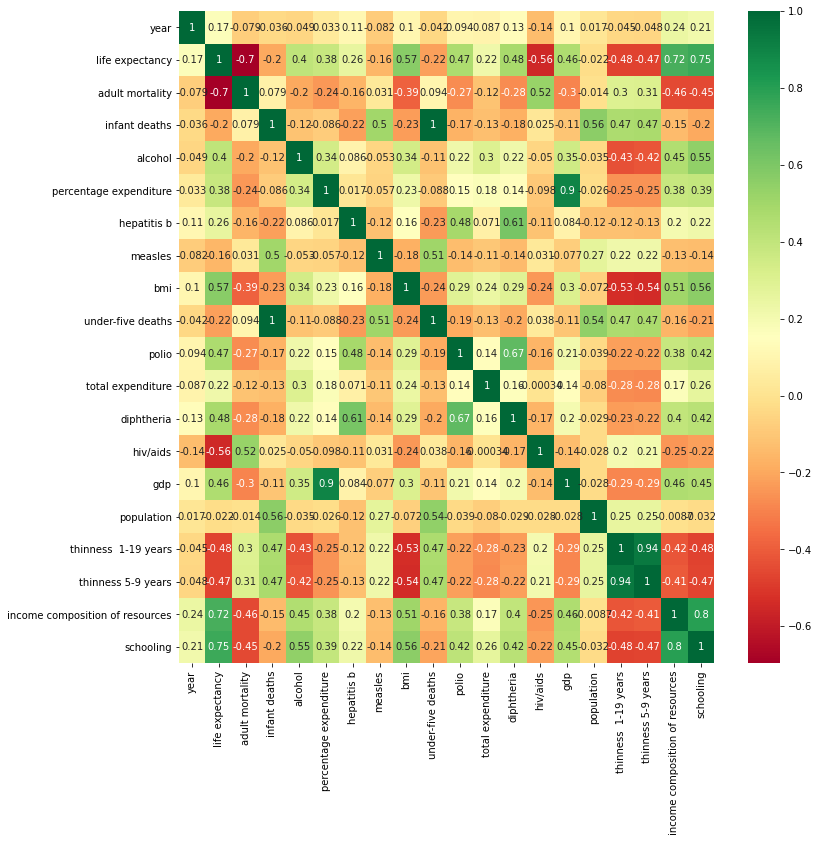

In [9]:
create_heatmap(raw_data)

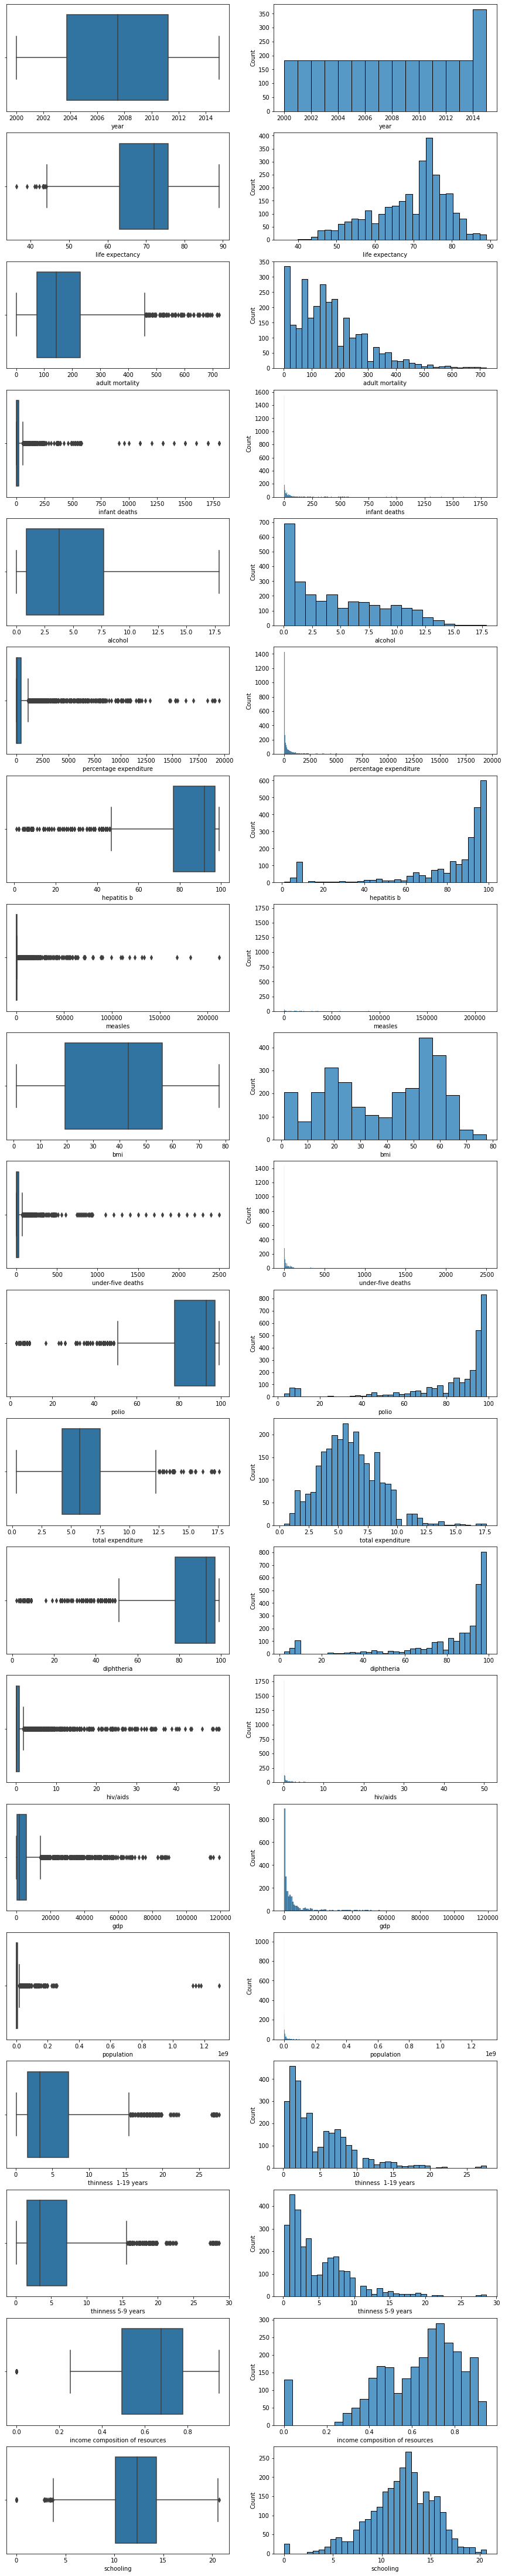

In [10]:
create_boxplot_and_histogram_all_columns(raw_data)

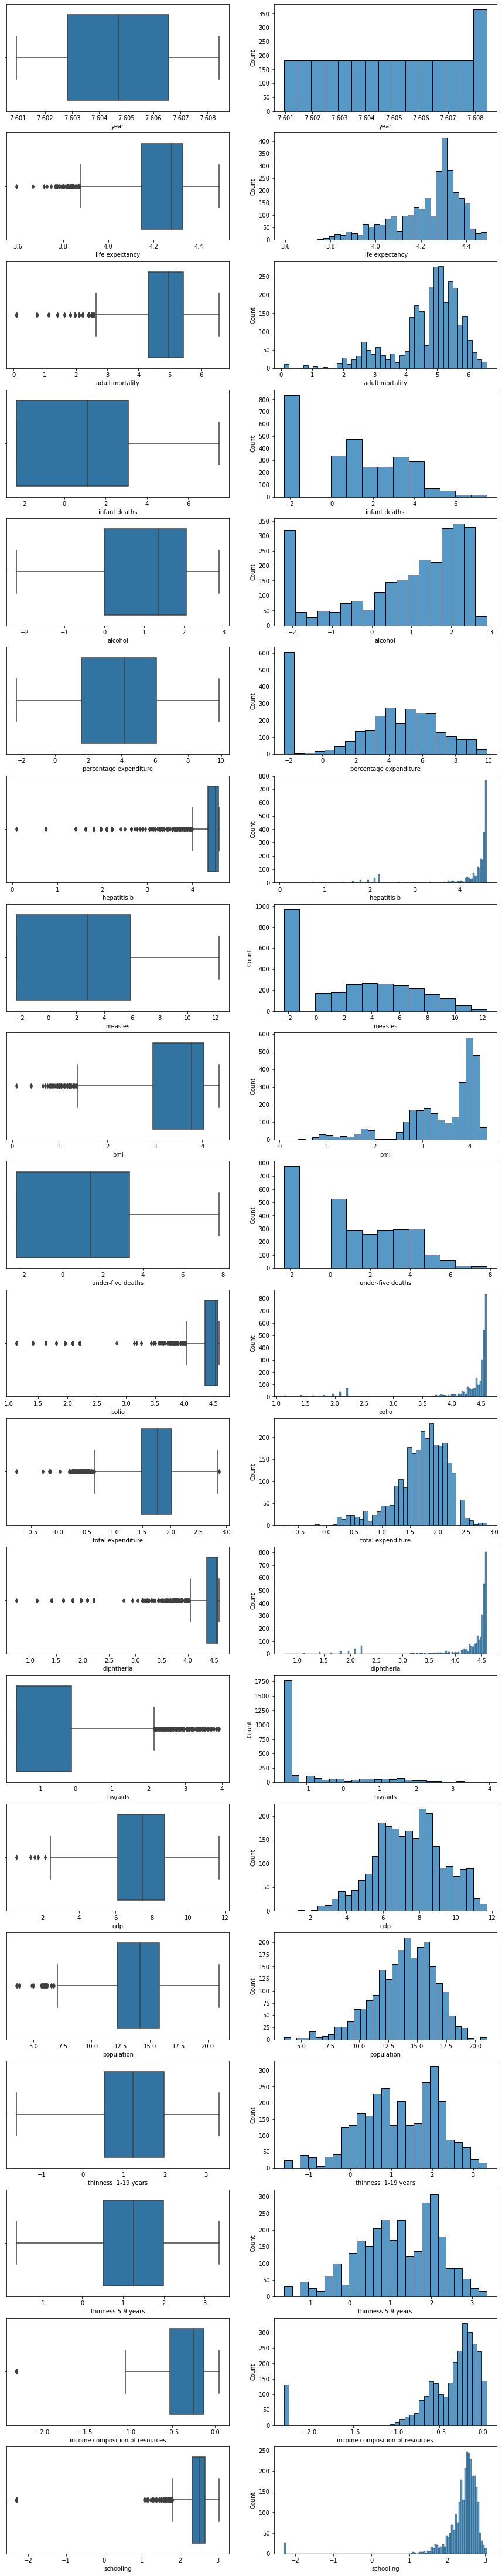

In [11]:
create_boxplot_and_histogram_all_columns(raw_data, log=True)

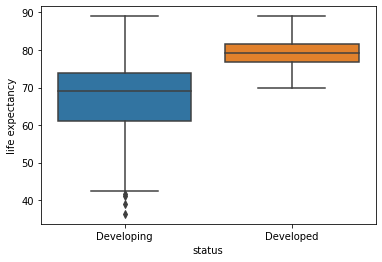

In [12]:
create_box_plot("status", "life expectancy",raw_data)

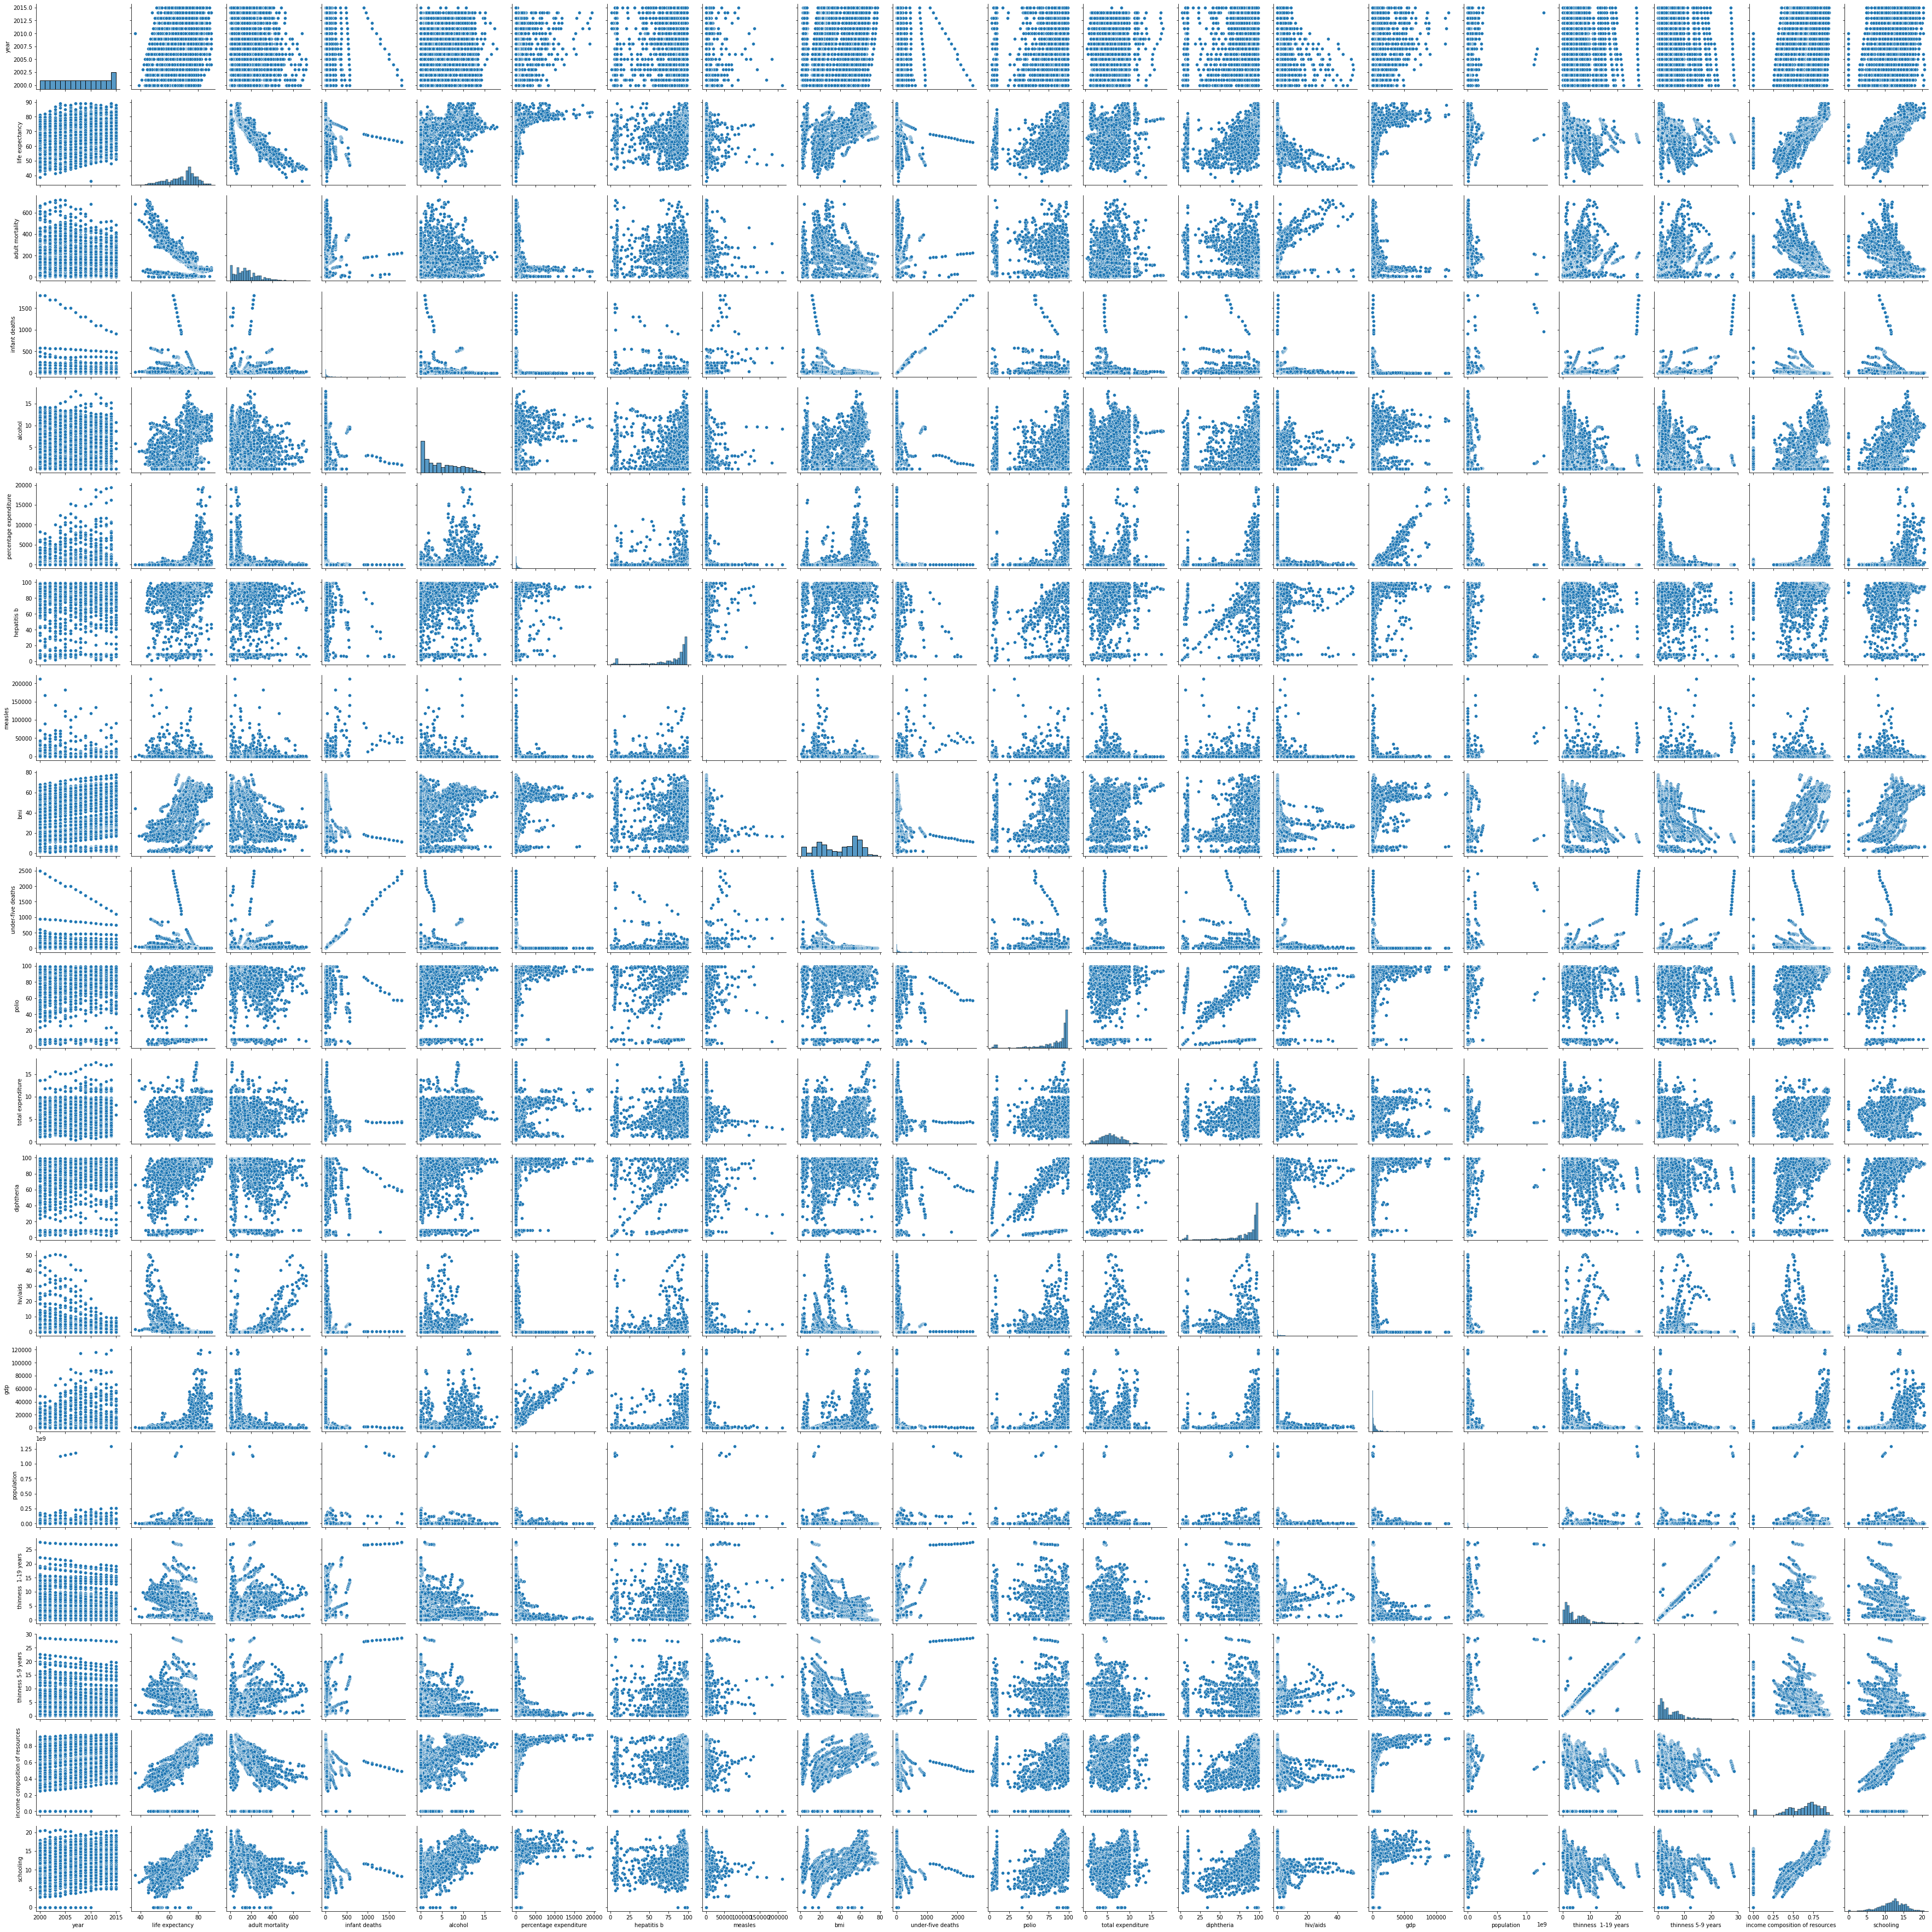

In [13]:
sns.pairplot(raw_data)

## MODELLING & PREDICTION

In [14]:
model_data = raw_data.copy()

In [15]:
# Dropping Columns

model_data = model_data.drop(columns=["country","year","population","total expenditure","hepatitis b"])

In [16]:
# Imputing median for features

model_data.loc[pd.isna(model_data["alcohol"]), "alcohol"] = model_data["alcohol"].median()
model_data.loc[pd.isna(model_data["schooling"]), "schooling"] = model_data["schooling"].median()
model_data.loc[pd.isna(model_data["income composition of resources"]), "income composition of resources"] = model_data["income composition of resources"].median()
model_data.loc[pd.isna(model_data["thinness 5-9 years"]), "thinness 5-9 years"] = model_data["thinness 5-9 years"].median()
model_data.loc[pd.isna(model_data["thinness  1-19 years"]), "thinness  1-19 years"] = model_data["thinness  1-19 years"].median()
model_data.loc[pd.isna(model_data["bmi"]), "bmi"] = model_data["bmi"].median()
model_data.loc[pd.isna(model_data["polio"]), "polio"] = model_data["polio"].median()
model_data.loc[pd.isna(model_data["diphtheria"]), "diphtheria"] = model_data["diphtheria"].median()
model_data.loc[pd.isna(model_data["gdp"]), "gdp"] = model_data["gdp"].median()

In [17]:
# LOG TRANSFORMATION

const = 0.001

model_data["adult mortality"] = np.log(model_data["adult mortality"]+const)
model_data["infant deaths"] = np.log(model_data["infant deaths"]+const)
model_data["percentage expenditure"] = np.log(model_data["percentage expenditure"]+const)
model_data["measles"] = np.log(model_data["measles"]+const)
model_data["under-five deaths"] = np.log(model_data["under-five deaths"]+const)
model_data["hiv/aids"] = np.log(model_data["hiv/aids"]+const)
model_data["gdp"] = np.log(model_data["gdp"]+const)

In [18]:
model_data.describe(include="all").T

count unique         top  freq       mean  \
status                             2928      2  Developing  2416        NaN   
life expectancy                  2928.0    NaN         NaN   NaN  69.224932   
adult mortality                  2928.0    NaN         NaN   NaN   4.707908   
infant deaths                    2928.0    NaN         NaN   NaN   -0.35965   
alcohol                          2928.0    NaN         NaN   NaN   4.559167   
percentage expenditure           2928.0    NaN         NaN   NaN    2.52706   
measles                          2928.0    NaN         NaN   NaN   1.018357   
bmi                              2928.0    NaN         NaN   NaN  38.291291   
under-five deaths                2928.0    NaN         NaN   NaN  -0.036914   
polio                            2928.0    NaN         NaN   NaN   82.61612   
diphtheria                       2928.0    NaN         NaN   NaN   82.39071   
hiv/aids                         2928.0    NaN         NaN   NaN  -1.211673   
gdp                              2928.0    NaN         NaN   NaN   7.468992   
thinness  1-19 years             2928.0    NaN         NaN   NaN   4.833675   
thinness 5-9 years               2928.0    NaN         NaN   NaN   4.865232   
income composition of resources  2928.0    NaN         NaN   NaN   0.630128   
schooling                        2928.0    NaN         NaN   NaN  12.016052   

                                       std       min       25%       50%  \
status                                 NaN       NaN       NaN       NaN   
life expectancy                   9.523867      36.3      63.1      72.1   
adult mortality                   1.073885     0.001  4.304079   4.96982   
infant deaths                     4.376563 -6.907755 -6.907755  1.098946   
alcohol                           3.920534      0.01    1.1075      3.77   
percentage expenditure            5.173997 -6.907755  1.579967  4.183765   
measles                           6.055351 -6.907755 -6.907755  2.833272   
bmi                              19.857308       1.0      19.4     43.35   
under-five deaths                 4.394637 -6.907755 -6.907755  1.386544   
polio                            23.355634       3.0      78.0      93.0   
diphtheria                       23.645132       2.0      78.0      93.0   
hiv/aids                          1.610951 -2.292635 -2.292635 -2.292635   
gdp                               1.730927  0.520192  6.360952  7.475892   
thinness  1-19 years              4.399553       0.1       1.6       3.3   
thinness 5-9 years                4.487535       0.1       1.6       3.4   
income composition of resources    0.20544       0.0     0.504     0.677   
schooling                         3.254407       0.0      10.3      12.3   

                                      75%        max  
status                                NaN        NaN  
life expectancy                      75.7       89.0  
adult mortality                   5.42935   6.583411  
infant deaths                    3.091088   7.495542  
alcohol                               7.4      17.87  
percentage expenditure           6.092701   9.877139  
measles                          5.892337  12.265204  
bmi                                  56.1       77.6  
under-five deaths                 3.33224   7.824046  
polio                                97.0       99.0  
diphtheria                           97.0       99.0  
hiv/aids                        -0.221894   3.923971  
gdp                              8.475044  11.688329  
thinness  1-19 years                  7.1       27.7  
thinness 5-9 years                    7.2       28.6  
income composition of resources     0.773      0.948  
schooling                            14.1       20.7

In [19]:
model_data["status"] = model_data["status"].map({'Developing': 1.0, 'Developed': 0.0})

np.random.seed(0)
train, test = train_test_split(model_data, train_size = 0.8, test_size = 0.2, random_state = 100)

scaler = MinMaxScaler()
train[train.columns] = scaler.fit_transform(train[train.columns])
test[train.columns] = scaler.transform(test[train.columns])

y_train = train.pop('life expectancy')
X_train = train

y_test = test.pop('life expectancy')
X_test = test

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2342, 16) (2342,) (586, 16) (586,)


                            feature        VIF
0                            status   9.250562
1                   adult mortality  19.983883
2                     infant deaths  64.044864
3                           alcohol   4.135418
4            percentage expenditure   4.784471
5                           measles   4.092094
6                               bmi   7.856751
7                 under-five deaths  68.718212
8                             polio  23.538655
9                        diphtheria  24.155640
10                         hiv/aids   2.554134
11                              gdp  27.107454
12             thinness  1-19 years  17.737488
13               thinness 5-9 years  17.757088
14  income composition of resources  33.679506
15                        schooling  48.980584

                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.836
Model:                            OLS   Ad

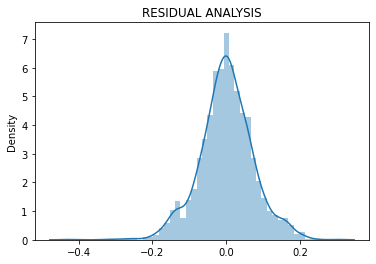

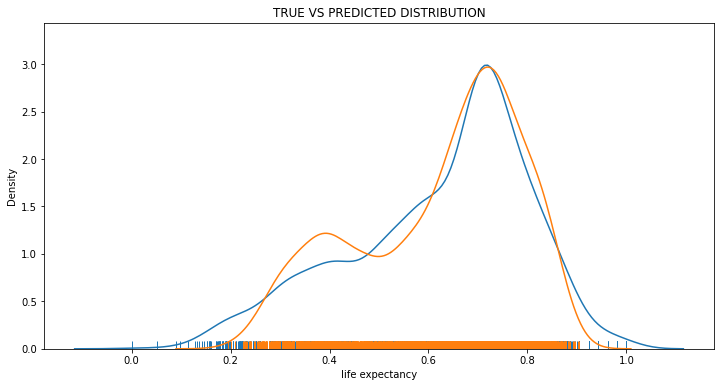

In [20]:
print(create_VIF_table(X_train))
print()

X_train = sm.add_constant(X_train)
lm = create_OLS_model(X_train, y_train, predict=True, res_analysis=True)
print(lm.summary())
print()

y_train_pred = lm.predict(X_train)
train_eval = model_evaluation(y_train, y_train_pred)
print(train_eval[0])

histogram_comparison_for_true_and_predicted_values(y_train, y_train_pred)

In [21]:
X_train.drop(columns=["const"], inplace=True, errors="ignore")
X_train.drop(columns=["thinness  1-19 years"], inplace=True, errors="ignore")
X_train.drop(columns=["infant deaths"], inplace=True, errors="ignore")
X_train.drop(columns=["bmi"], inplace=True, errors="ignore")
X_train.drop(columns=["alcohol"], inplace=True, errors="ignore")
X_train.drop(columns=["schooling"], inplace=True, errors="ignore")
X_train.drop(columns=["gdp"], inplace=True, errors="ignore")
X_train.drop(columns=["diphtheria"], inplace=True, errors="ignore")
X_train.drop(columns=["adult mortality"], inplace=True, errors="ignore")
X_train.drop(columns=["polio"], inplace=True, errors="ignore")

                           feature       VIF
0                           status  5.970121
1           percentage expenditure  4.121765
2                          measles  3.962544
3                under-five deaths  6.151197
4                         hiv/aids  2.036125
5               thinness 5-9 years  3.014323
6  income composition of resources  5.794290

                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1461.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:36:38   Log-Likelihood:                 2648.7
No. Observations:                2342   AIC:                            -5281.
Df Residuals:                    2334   BIC:                            -5235.
Df Mode

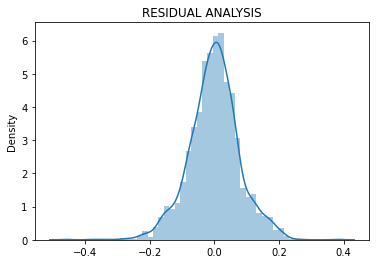

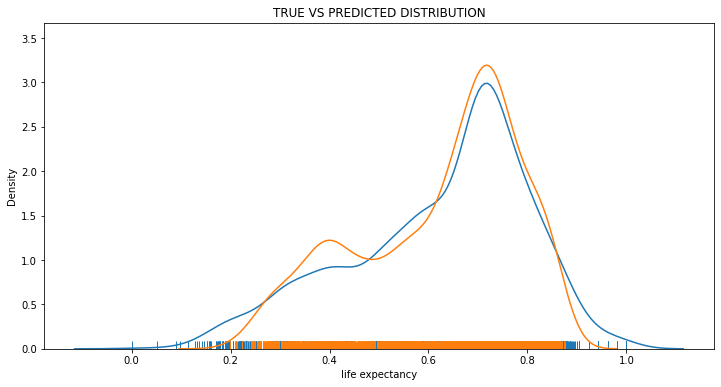

In [22]:
print(create_VIF_table(X_train))
print()

X_train = sm.add_constant(X_train)
lm = create_OLS_model(X_train, y_train, predict=True, res_analysis=True)
print(lm.summary())
print()

y_train_pred = lm.predict(X_train)
train_eval = model_evaluation(y_train, y_train_pred)
print(train_eval[0])

histogram_comparison_for_true_and_predicted_values(y_train, y_train_pred)

        Scores
MSE   0.006333
RMSE  0.079579
MAE   0.061594
R2    0.801173


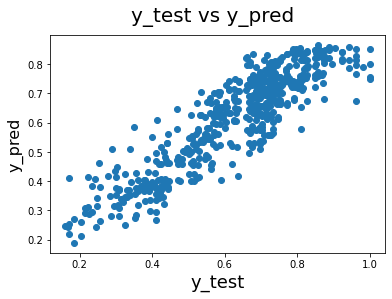

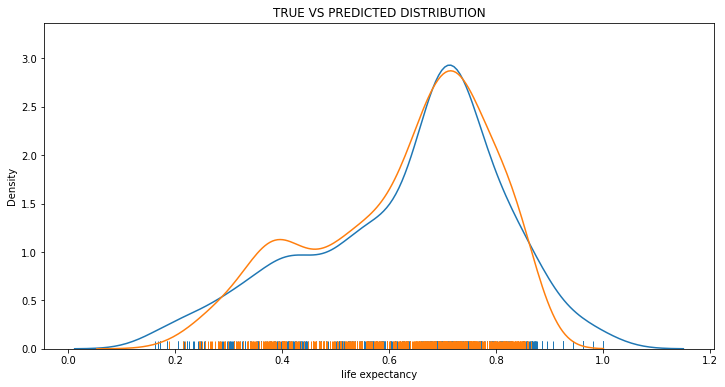

In [23]:
X_test = sm.add_constant(X_test)
X_test = X_test[[x for x in X_train.columns]]

y_test_pred = lm.predict(X_test)

plot_predictions(y_test, y_test_pred)

y_test_pred = lm.predict(X_test)
test_eval = model_evaluation(y_test, y_test_pred)
print(test_eval[0])

histogram_comparison_for_true_and_predicted_values(y_test, y_test_pred)